Seraina Kytili 9728
---
Matthieu Ndumbi Lukuenya 9217
---


# Imports

In [ ]:
# Imports.
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# PREPROCESSING

In [ ]:
# Preprocessing.
# Insert the dataset into a Dataframe called movies_df
df = pd.read_csv("/data/dataset.csv", header=None)

# Separate into X (features) and y (label)
X = df.iloc[:, :-1] # Select all columns except the last one
y = df.iloc[:, -1] # Select the last column

# Split data 50% - 50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                     random_state=77)

# Create a dictionary for the mean error value of each classifier
mean_errors = {}

# PART A

Error of same covariance: 0.150
Error of different covariance: 0.121


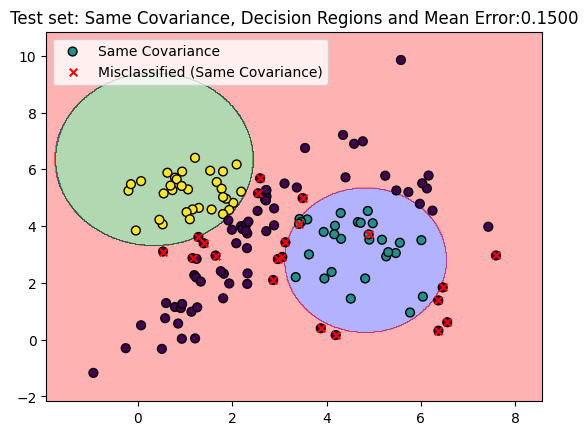

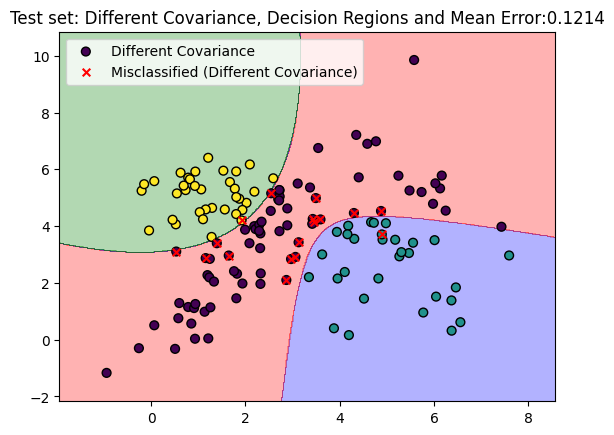

Choosing Naive Bayes with different covariance matrices.


In [ ]:
# Part A.1
# Train a Naive Bayes classifier with MLE and assuming the same covariance
# matrix for all classes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
ySame_pred = classifier.predict(X_test)

# Calculate error
mean_error_same_covariance  = 1 - accuracy_score(y_test, ySame_pred)
mean_errors["Same Covariance"] = mean_error_same_covariance
print(f"Error of same covariance: {mean_error_same_covariance:.3f}")


# Part A.2
# Initialize a Quadratic Discriminant Analysis (QDA) classifier
qda = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda.fit(X_train, y_train)

# Predict the labels for the test set
yDiff_pred = qda.predict(X_test)

# Calculate error
mean_error_diff_covariance  = 1 - accuracy_score(y_test, yDiff_pred)
mean_errors["Different Covariance"] = mean_error_diff_covariance
print(f"Error of different covariance: {mean_error_diff_covariance:.3f}")


# Part A.3
# Define the function for plotting the regions and the misclassified points
def plot_decision_regions_and_misclassified(X, y, classifier, predictions,
                                            title, resolution=0.02):
    h = resolution  # step size in the mesh

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    fig, ax = plt.subplots()

    # Plot decision regions
    if hasattr(classifier, 'predict'):
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    else:  # In the case of Naive Bayes where we use logpdf
        Z = np.argmax([d.logpdf(np.c_[xx.ravel(), yy.ravel()]) for d in
                       classifier], axis=0)

    Z = Z.reshape(xx.shape)

    unique_classes = np.unique(y)
    markers = ['o', '^', 's', 'D', 'v', 'p', '*', 'H', '+', 'x']
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink',
              'gray', 'cyan', 'yellow']
    cmap_background = ListedColormap(colors[:len(unique_classes)])
    ax.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)

    # Plot the test points
    scatter_classifier = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=predictions,
                                    cmap='viridis',
                                    edgecolor='k',
                                    s=40,
                                    label=title)

    # Mark misclassified points
    misclassified_indices = y != predictions
    ax.scatter(X.loc[misclassified_indices, 0], X.loc[misclassified_indices, 1],
               marker='x', color='red', s=30, label=f'Misclassified ({title})')

    mean_error = 1 - accuracy_score(y, predictions)
    # Set plot labels and legend
    ax.set_title(f'Test set: {title}, Decision Regions and Mean Error:' +
              f'{mean_error:.4f}')
    ax.legend()

    # Show the plot
    plt.show()


plot_decision_regions_and_misclassified(X_test, y_test, classifier, ySame_pred,
                                        'Same Covariance')
plot_decision_regions_and_misclassified(X_test, y_test, qda,
                                        yDiff_pred, 'Different Covariance')


# Choose the model with the smallest mean error
if mean_error_same_covariance < mean_error_diff_covariance:
    print("Choosing Naive Bayes with the same covariance matrix.")
else:
    print("Choosing Naive Bayes with different covariance matrices.")

# PART B

Error of KNN: 0.114


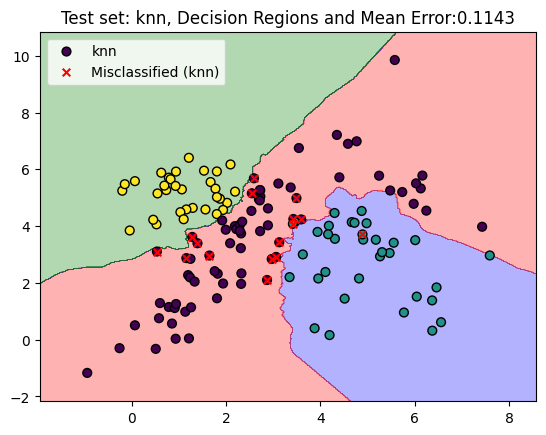

Error of KNN for split 1: 0.143


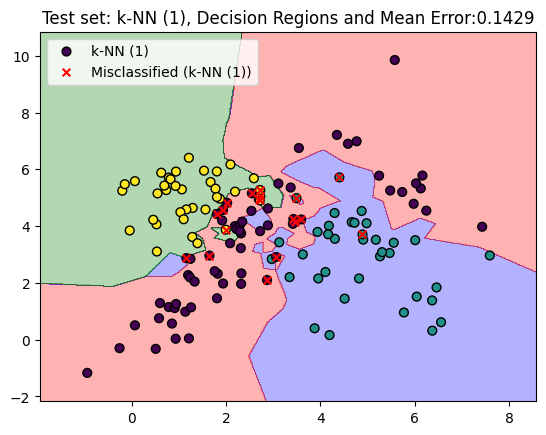

Error of KNN for split 2: 0.164


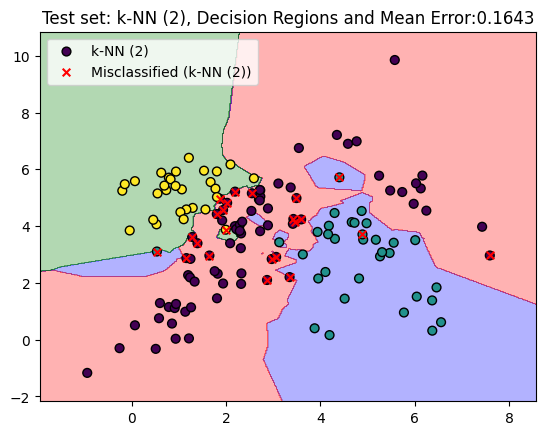

Error of KNN for split 3: 0.136


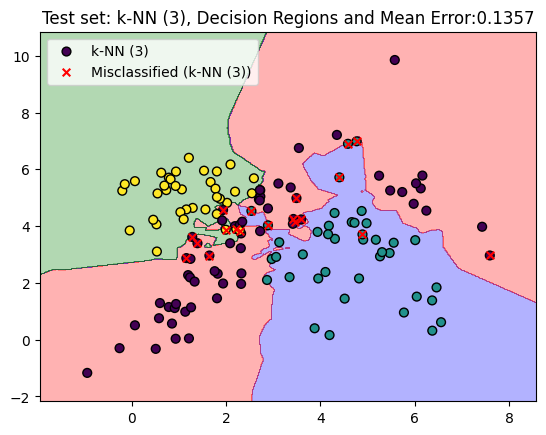

Error of KNN for split 4: 0.129


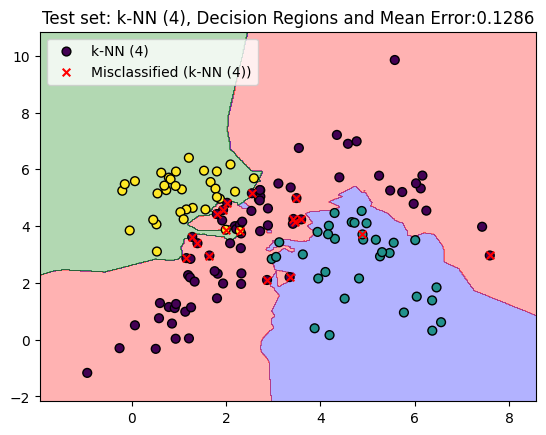

Error of KNN for split 5: 0.093


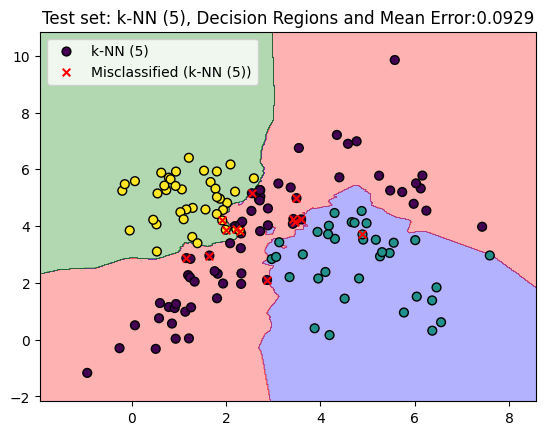

Error of KNN for split 6: 0.121


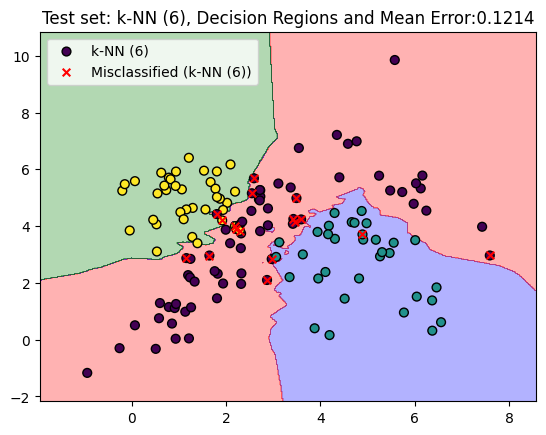

Error of KNN for split 7: 0.093


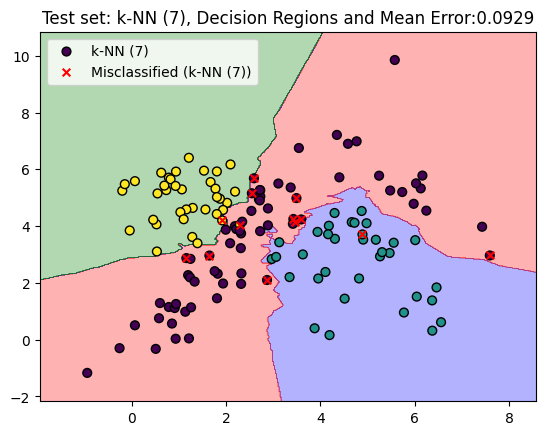

Error of KNN for split 8: 0.107


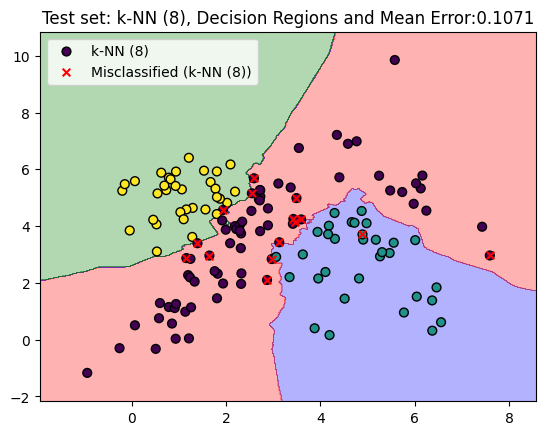

Error of KNN for split 9: 0.114


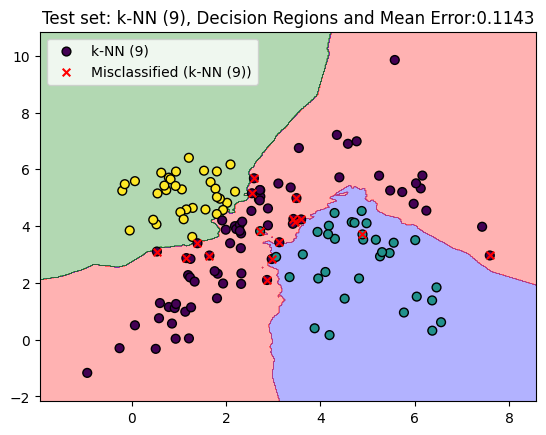

Error of KNN for split 10: 0.114


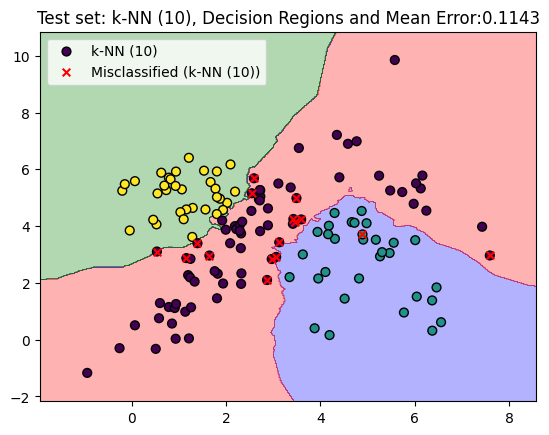

Mean Error (Same Covariance): 0.150
Mean Error (Different Covariance): 0.121
Mean Error (KNN): 0.114
Mean Error (KNN_1): 0.143
Mean Error (KNN_2): 0.164
Mean Error (KNN_3): 0.136
Mean Error (KNN_4): 0.129
Mean Error (KNN_5): 0.093
Mean Error (KNN_6): 0.121
Mean Error (KNN_7): 0.093
Mean Error (KNN_8): 0.107
Mean Error (KNN_9): 0.114
Mean Error (KNN_10): 0.114


In [ ]:
# Part B.1
# Find the k (number of neighbors) based on the length of the sample dataset
N = len(df)
k = int(math.sqrt(N))
if k % 3 == 0:
  k += 1

# Train k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k, p=3)
knn_classifier.fit(X_train, y_train)

# Make predictions on test dataset
yKNN_pred = knn_classifier.predict(X_test)

# Calculate error for k-NN classifier
mean_error_KNN = 1 - accuracy_score(y_test, yKNN_pred)
mean_errors["KNN"] = mean_error_KNN
print(f"Error of KNN: {mean_error_KNN:.3f}")


# Part B.2
plot_decision_regions_and_misclassified(X_test, y_test, knn_classifier, yKNN_pred, 'knn')


# B.3
# Repeat the process for k being between 1 and 10
# Number of splits
num_splits = 10

# Loop through different splits
for split in range(1, num_splits + 1):

    # Train k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=split)
    knn_classifier.fit(X_train, y_train)

    # Make predictions on test dataset
    yKNN_pred = knn_classifier.predict(X_test)

    # Calculate error for k-NN classifier
    mean_error_KNN = 1 - accuracy_score(y_test, yKNN_pred)
    mean_errors[f"KNN_{split}"] = mean_error_KNN
    print(f"Error of KNN for split {split}: {mean_error_KNN:.3f}")

    # Plot decision regions for k-NN classifier
    plot_decision_regions_and_misclassified(X_test, y_test, knn_classifier, yKNN_pred, f'k-NN ({split})')


# Print mean errors for each split
for key, value in mean_errors.items():
    print(f"Mean Error ({key}): {value:.3f}")

# PART C


## C.1 - C.2

In [ ]:
# Part C.1
# Create an SVM classifier with linear kernel
SVM_classifier = SVC(kernel='linear')
SVM_classifier.fit(X_train, y_train)

# Make predictions on the test set
ySVMLinear_pred = SVM_classifier.predict(X_test)

# Calculate error
mean_error_SVM_linear  = 1 - accuracy_score(y_test, ySVMLinear_pred)
mean_errors["SVM linear"] = mean_error_SVM_linear
print(f"Error of SVM linear: {mean_error_SVM_linear:.3f}")


# Part C.2
# Define the parameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale', 'auto']
}

# Create an SVM classifier with RBF kernel
svm_classifier_rbf = SVC(kernel='rbf')

# Perform grid search for RBF kernel with cross-validation
grid_search_rbf = GridSearchCV(svm_classifier_rbf, param_grid_rbf, cv=5,
                               scoring='accuracy')
grid_search_rbf.fit(X_train, y_train)

# Get the results as a DataFrame
results_df = pd.DataFrame(grid_search_rbf.cv_results_)

# Display the results, including hyperparameters and accuracy
print("Grid Search Results:")
print(results_df[['params', 'mean_test_score']])

# Get the best parameters for RBF kernel
best_params_rbf = grid_search_rbf.best_params_

# Train the model with the best parameters for RBF kernel
best_svm_classifier_rbf = SVC(kernel='rbf', **best_params_rbf)
best_svm_classifier_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rbf = best_svm_classifier_rbf.predict(X_test)

# Calculate accuracy on the test data
accuracy_test = 1 - accuracy_score(y_test, y_pred_rbf)

print(f"\nBest hyperparameters for RBF kernel: {best_params_rbf}")
print(f"Error on the test dataset: {accuracy_test:.3f}")

Error of SVM linear: 0.179
Grid Search Results:
                          params  mean_test_score
0       {'C': 0.1, 'gamma': 0.1}         0.750000
1         {'C': 0.1, 'gamma': 1}         0.628571
2   {'C': 0.1, 'gamma': 'scale'}         0.800000
3    {'C': 0.1, 'gamma': 'auto'}         0.757143
4         {'C': 1, 'gamma': 0.1}         0.864286
5           {'C': 1, 'gamma': 1}         0.814286
6     {'C': 1, 'gamma': 'scale'}         0.835714
7      {'C': 1, 'gamma': 'auto'}         0.835714
8        {'C': 10, 'gamma': 0.1}         0.821429
9          {'C': 10, 'gamma': 1}         0.807143
10   {'C': 10, 'gamma': 'scale'}         0.821429
11    {'C': 10, 'gamma': 'auto'}         0.828571

Best hyperparameters for RBF kernel: {'C': 1, 'gamma': 0.1}
Error on the test dataset: 0.100


## C.3

In [ ]:
# Part C.3
# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ['o', 's', '^', 'v', 'x']
    colors = ['red', 'blue', 'lightgreen', 'purple', 'cyan']
    cmap = plt.get_cmap('viridis')

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl].iloc[:, 0], y=X[y == cl].iloc[:, 1], alpha=0.8, c=[cmap(idx)] * sum(y == cl), marker=markers[idx], label=cl)


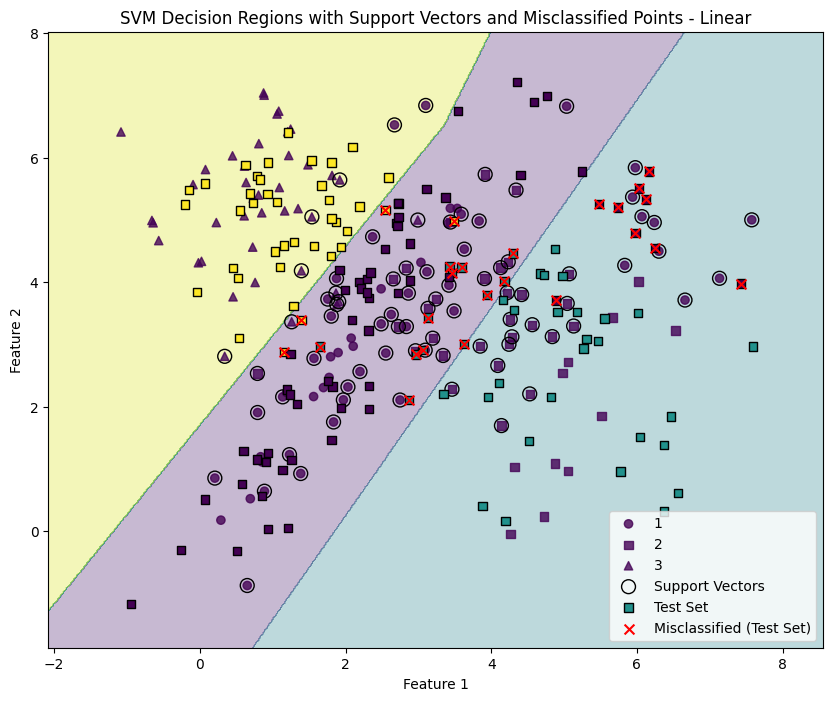

In [ ]:
# PLOT SVM LINEAR
# Plot decision regions for the SVM classifier
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier=SVM_classifier)

# Plot the support vectors
plt.scatter(SVM_classifier.support_vectors_[:, 0], SVM_classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

# Plot the test set
plt.scatter(X_test.loc[:, 0], X_test.loc[:, 1], c=y_test, marker='s', cmap='viridis', edgecolors='k', label='Test Set')

# Plot the misclassified points in the test set
misclassified_indices = y_test != ySVMLinear_pred
plt.scatter(X_test.loc[misclassified_indices, 0], X_test.loc[misclassified_indices, 1],
            marker='x', color='red', s=50, label='Misclassified (Test Set)')

plt.title('SVM Decision Regions with Support Vectors and Misclassified Points - Linear')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

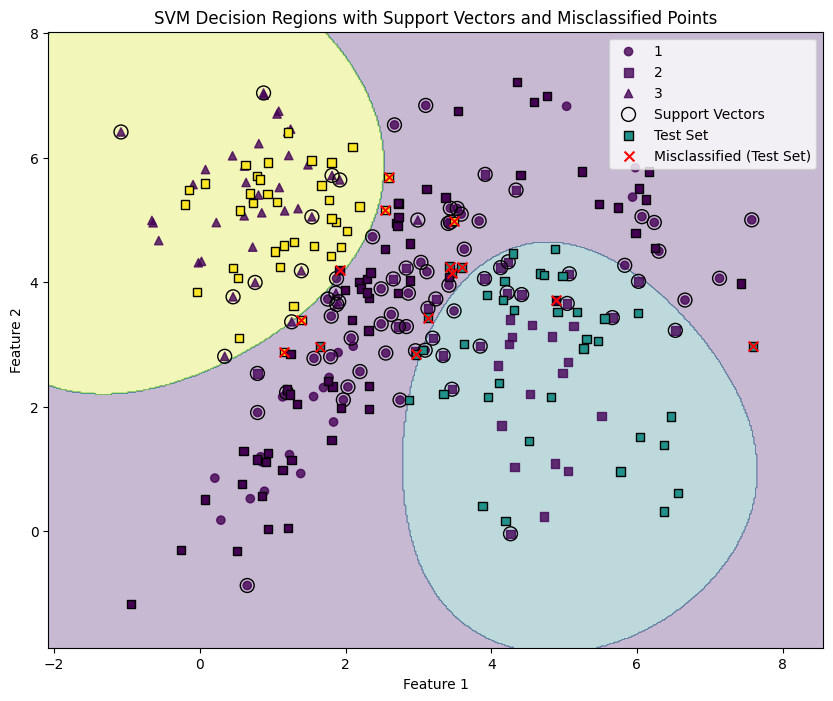

In [ ]:
# PLOT SVM RBF KERNEL
# Plot decision regions for the SVM classifier
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier=best_svm_classifier_rbf)

# Plot the support vectors
plt.scatter(best_svm_classifier_rbf.support_vectors_[:, 0], best_svm_classifier_rbf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

# Plot the test set
plt.scatter(X_test.loc[:, 0], X_test.loc[:, 1], c=y_test, marker='s', cmap='viridis', edgecolors='k', label='Test Set')

# Plot the misclassified points in the test set
misclassified_indices = y_test != y_pred_rbf
plt.scatter(X_test.loc[misclassified_indices, 0], X_test.loc[misclassified_indices, 1],
            marker='x', color='red', s=50, label='Misclassified (Test Set)')

plt.title('SVM Decision Regions with Support Vectors and Misclassified Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()